In [7]:
from pathlib import Path
import pandas as pd
import numpy as np

In [8]:

# Load ROI data
data_path = Path("../data/roi_data.pickle")
data = pd.read_pickle(data_path)

# Extract the DataFrames
rois_df = data['rois']
summary_df = data['summary']

print("ROI Data Statistics")
print("=" * 50)
print(f"\nROIs DataFrame:")
print(f"  Rows: {len(rois_df)}")
print(f"  Columns: {len(rois_df.columns)}")
print(f"  Column names: {list(rois_df.columns)}")
print(f"\n  Memory usage: {rois_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n\nSummary DataFrame:")
print(f"  Rows: {len(summary_df)}")
print(f"  Columns: {len(summary_df.columns)}")
print(f"  Column names: {list(summary_df.columns)}")
print(f"\n  Memory usage: {summary_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 50)
print("\nFirst few rows of ROIs DataFrame:")
print(rois_df.head())

print("\n" + "=" * 50)
print("\nFirst few rows of Summary DataFrame:")
print(summary_df.head())

print("\n" + "=" * 50)
print("\nData types:")
print("\nROIs DataFrame:")
print(rois_df.dtypes)
print("\nSummary DataFrame:")
print(summary_df.dtypes)

ROI Data Statistics

ROIs DataFrame:
  Rows: 81673
  Columns: 23
  Column names: ['id', 'stub', 'roi_id', 'centroid_x', 'centroid_y', 'pixel_count', 'pixel_size', 'area', 'neighbor_count', 'mean_neighbor_distance', 'profile_h', 'profile_v', 'profile_d45', 'profile_d135', 'profile_mean', 'profile_length_h', 'profile_length_v', 'profile_length_d', 'diameter_fwhm', 'diameter_deriv', 'profile_mad', 'diameter_area', 'diameter_baseline']

  Memory usage: 72.69 MB


Summary DataFrame:
  Rows: 306
  Columns: 19
  Column names: ['id', 'stub', 'mean_neighbor_count', 'mean_neighbor_distance', 'mean_roi_area', 'mean_pixel_size', 'mean_diameter_area', 'mean_diameter_fwhm', 'mean_diameter_deriv', 'mean_profile_mad', 'porosity_square', 'porosity_hex', 'porosity_blend', 'blend_weight', 'mean_profile', 'mean_profile_diameter', 'mean_profile_diameter_deriv', 'mean_profile_diameter_baseline', 'mean_profile_step']

  Memory usage: 0.12 MB


First few rows of ROIs DataFrame:
              id               

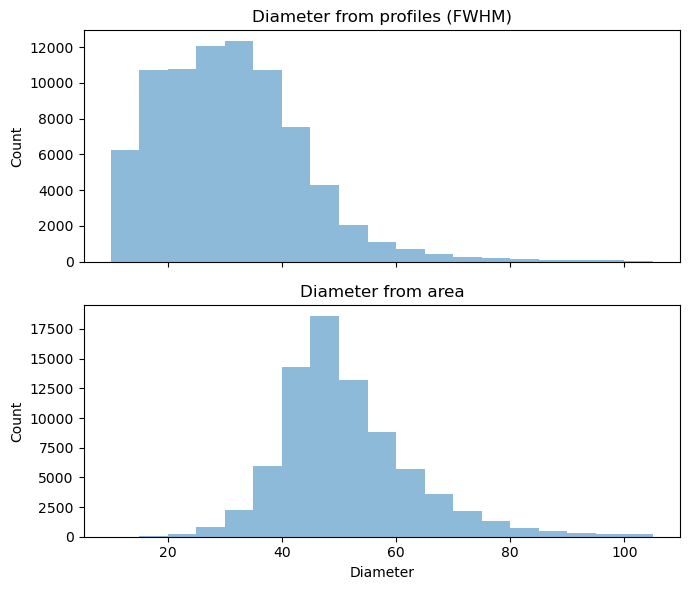

In [16]:
import matplotlib.pyplot as plt

bins = np.arange(10, 110, 5)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(7, 6))

if "diameter_fwhm" in rois_df.columns:
    rois_df["diameter_fwhm"].dropna().plot.hist(bins=bins, alpha=0.5, ax=axes[0])
    axes[0].set_title("Diameter from profiles (FWHM)")
    axes[0].set_ylabel("Count")
else:
    axes[0].text(0.5, 0.5, "No diameter_fwhm column", ha="center", va="center")
    axes[0].set_axis_off()

rois_df["diameter_area"].dropna().plot.hist(bins=bins, alpha=0.5, ax=axes[1])
axes[1].set_title("Diameter from area")
axes[1].set_xlabel("Diameter")
axes[1].set_ylabel("Count")

plt.tight_layout()

<Axes: ylabel='Frequency'>

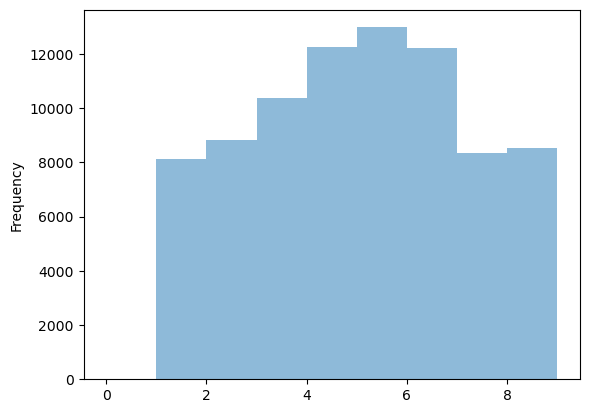

In [19]:
rois_df.neighbor_count.plot.hist(bins=np.arange(0, 10, 1), alpha=0.5)

In [17]:
summary_df

,id,stub,mean_neighbor_count,mean_neighbor_distance,mean_roi_area,mean_pixel_size,mean_diameter_area,mean_diameter_fwhm,mean_diameter_deriv,mean_profile_mad,porosity_square,porosity_hex,porosity_blend,blend_weight,mean_profile,mean_profile_diameter,mean_profile_diameter_deriv,mean_profile_diameter_baseline,mean_profile_step
0,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME01,4.433460,25.615840,2597.115464,5.073,55.870837,42.838473,49.509481,23.748083,3.957984,4.570287,4.076346,0.216730,"[92.89733840304183, 92.95817490494296, 92.9971...",69.779570,38.946737,162.278069,0.319886
1,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_02,4.888889,223.843034,19163.247968,5.131,129.001668,62.650286,147.490372,31.040679,0.382456,0.441623,0.406671,0.444444,"[135.47222222222223, 135.08333333333334, 134.4...",33.631158,NaN,258.701216,0.504193
2,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_03,3.413793,64.562369,48485.974745,8.810,181.294192,63.910728,157.217950,23.470291,11.632076,13.431564,11.632076,0.000000,"[155.77586206896552, 155.1206896551724, 154.56...",112.853475,136.202470,381.366915,0.441714
3,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_04,3.508711,14.949913,24581.713522,16.440,172.663007,70.476240,176.052076,18.376858,109.985344,127.000136,109.985344,0.000000,"[117.61106271777004, 117.77134146341463, 117.8...",183.554169,113.371693,464.284075,0.328385
4,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_05,5.325581,55.288238,11007.934833,5.576,99.405625,41.401273,74.115997,18.479813,3.601143,4.158242,3.952076,0.662791,"[96.69767441860465, 96.37209302325581, 96.1918...",25.245470,36.720684,218.029062,0.411593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_10,5.181818,187.948427,14857.641760,3.692,128.898652,35.099834,98.515668,25.436777,0.420603,0.485671,0.456764,0.590909,"[133.1590909090909, 132.5909090909091, 132.136...",32.095991,61.899411,229.257078,0.620956
302,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_11,0.000000,NaN,12148.291727,9.217,124.369150,14.219869,159.220448,0.000000,NaN,NaN,NaN,0.000000,"[143.25, 142.0, 140.75, 141.0, 141.25, 141.25,...",58.579879,143.195260,325.443774,0.353091
303,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_12,3.666667,219.845025,12508.589531,3.692,120.435907,19.446610,47.464517,17.722917,0.258806,0.298844,0.258806,0.000000,"[100.875, 100.08333333333333, 99.625, 101.5416...",19.380247,NaN,215.336076,0.583250
304,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_overview01,1.000000,220.738353,23676.720345,3.489,124.437730,39.448350,54.067812,23.436250,0.485921,0.561094,0.485921,0.000000,"[75.25, 74.3125, 75.4375, 76.5625, 76.8125, 76...",60.993919,NaN,58.647999,0.672376
